# 1)Import required libraries and read the dataset.

In [993]:
#Importing the required Libaries

import numpy as np
import pandas as pd
from datetime import datetime 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [994]:
#To Read the Data file

data_set=pd.read_csv('Apps_data+(1).csv')

In [995]:
#The data_set

data_set

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


The Dataset discribes the Google App Store Rating Dataset.

# 2)Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [996]:
#To view some samples

data_set.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4561,Neon-R (Red),PERSONALIZATION,4.7,25,41M,100+,Paid,$0.99,Everyone,Personalization,"March 12, 2015",1.0,4.0.3 and up
3799,AC - Tips & News for Android™,NEWS_AND_MAGAZINES,4.2,23292,14M,"1,000,000+",Free,0,Everyone 10+,News & Magazines,"May 24, 2018",3.1.12,4.1 and up
3735,BBC Persian | BBC Farsi News,NEWS_AND_MAGAZINES,4.3,978,2.9M,"100,000+",Free,0,Everyone,News & Magazines,"May 12, 2018",1.8.2,4.0.3 and up


In [997]:
#To know the shape of the data (Rows,columns)

data_set.shape

(10841, 13)

From the shape function it explains that there are 10841 rows and 13 columns

In [998]:
#To know the datatypes of the dataset

data_set.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [999]:
#To know the info() of the dataset

data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


From the info() and dtypes,it shows that there are 12 object and 1 float datatypes

Some of the catagorical data can be converted into Numerical data(size,installs,price,.....)

# 3) Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [1000]:
#To find the statistical summary for Numerical columns

data_set.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [1001]:
#To find the statistical summary for catagorical columns

data_set.describe(include=object)

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [1002]:
#To view the columns in the dataset

data_set.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Inference:

Except 'App','Genres','Last Updated', 'Current Ver','Android Ver',all the columns are used to build a model for predictive analysis

# 4) Check if there are any duplicate records in the dataset? if any drop them.

In [1003]:
#To find the duplicate values

data_set.duplicated('App').sum()

1181

In [1004]:
#Removing Duplicates using drop() function

data_set.drop_duplicates('App',keep='last',inplace=True)

In [1005]:
#To check the duplicate values after dropping

data_set.duplicated('App').sum()

0

# 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [1006]:
#To find the unique values counts

data_set['Category'].value_counts()

Category
FAMILY                 1906
GAME                    926
TOOLS                   829
BUSINESS                419
MEDICAL                 396
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  327
COMMUNICATION           316
HEALTH_AND_FITNESS      287
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
ENTERTAINMENT            79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [1007]:
#Replacing the non-unique values 

garbage_value=data_set['Category']=='1.9'
garbage_value.sum()

data_set[garbage_value]=data_set[garbage_value].dropna()

In [1008]:
data_set['Category'].value_counts()

Category
FAMILY                 1906
GAME                    926
TOOLS                   829
BUSINESS                419
MEDICAL                 396
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  327
COMMUNICATION           316
HEALTH_AND_FITNESS      287
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
ENTERTAINMENT            79
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

# 6) Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [1009]:
#To check the null values in Rating catagory

data_set['Rating'].isnull().sum()

1464

In [1010]:
#Replacing the null values

data_set['Rating']=data_set['Rating'].fillna(data_set['Rating'].median())

In [1011]:
#To check the null values in Rating catagory after replacing

data_set['Rating'].isnull().sum()

0

In [1012]:
#Creating a new column Rating_category using lambda function

data_set['Rating_category']=data_set['Rating'].apply(lambda x:'High' if x>3.5 else 'Low')

In [1013]:
#data_set after creating the new column

data_set.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
8733,CHRONO TRIGGER (Upgrade Ver.),FAMILY,3.8,11250,6.3M,"100,000+",Paid,$9.99,Everyone 10+,Role Playing,"June 12, 2018",2.0.4,4.2 and up,High
1314,"JEFIT Workout Tracker, Weight Lifting, Gym Log...",HEALTH_AND_FITNESS,4.5,60096,27M,"5,000,000+",Free,0,Teen,Health & Fitness,"April 7, 2018",10.0,4.0.3 and up,High
6922,BW Map mobile,TRAVEL_AND_LOCAL,3.6,57,32M,"10,000+",Free,0,Everyone,Travel & Local,"May 31, 2018",3.2,4.0 and up,High
10371,Angry Birds Space HD,GAME,4.5,43645,46M,"5,000,000+",Free,0,Everyone,Arcade,"May 25, 2018",2.2.13,4.1 and up,High
7865,CT Brain Interpretation,FAMILY,5.0,3,29M,500+,Free,0,Everyone,Education,"July 4, 2018",5.0.16,4.0 and up,High


# 7) Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [1014]:
#To check the statistical summary

data_set['Rating_category'].describe()

count     9660
unique       2
top       High
freq      8787
Name: Rating_category, dtype: object

In [1015]:
#To view the number of values in the Rating_category

data_set['Rating_category'].value_counts()

Rating_category
High    8787
Low      873
Name: count, dtype: int64

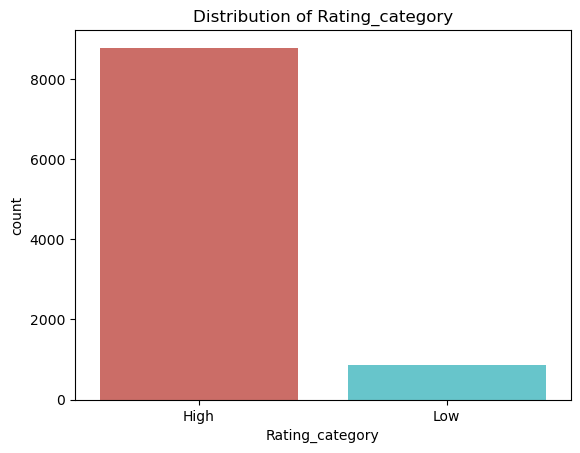

In [1016]:
#To view the distribution of Rating_category column using countplot

sns.countplot(x='Rating_category', data=data_set,palette='hls')
plt.title('Distribution of Rating_category')
plt.show()

From the plot,it describes that the Rating_category has high numeber of rating

# 8) Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [1017]:
#Datatype of Reviews column

data_set['Reviews'].dtypes

dtype('O')

In [1018]:
#Converting the Reviews column into numerical

data_set['Reviews']=data_set['Reviews'].astype(float)


In [1019]:
#Datatype of Reviews column after converting to numerical

data_set['Reviews'].dtypes

dtype('float64')

In [1020]:
#To check the null values in Reviews column

data_set['Reviews'].isnull().sum()

1

In [1021]:
#Replacing the null values with the mean

data_set['Reviews']=data_set['Reviews'].fillna(data_set['Reviews'].mean())

In [1022]:
#To check the null values in Reviews column after replacing

data_set['Reviews'].isnull().sum()

0

In [1023]:
#To view the skewness

data_set['Reviews'].skew()

26.569791370956434

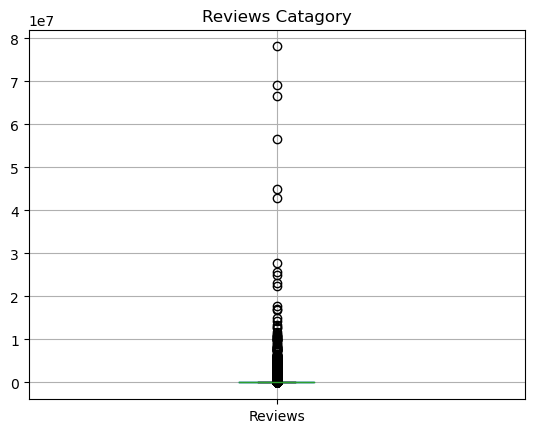

In [1024]:
#Plotting boxplot for viewing outliers

data_set.boxplot('Reviews')
plt.title('Reviews Catagory')
plt.show()

From the boxplot,it shows that there are more outliers in the boxplot

In [1025]:
#use of log transformation to reduce the outliers

data_set['Reviews']=np.log1p(data_set['Reviews'])

In [1026]:
#To view the skewness after log transformation

data_set['Reviews'].skew()

0.045603334846059045

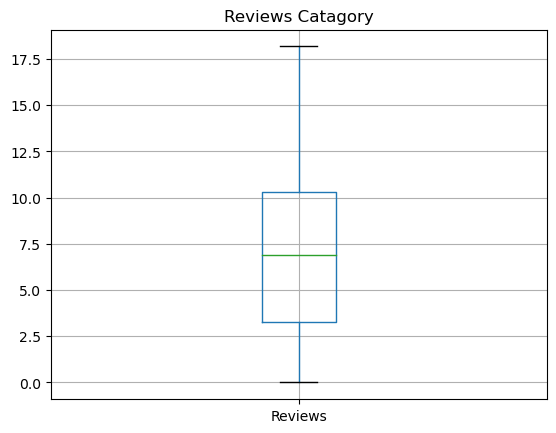

In [1027]:
#Plotting boxplot for viewing outliers after log transformation

data_set.boxplot('Reviews')
plt.title('Reviews Catagory')
plt.show()

# 9) The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [1028]:
#To viwe the elements in the Size column

data_set['Size'].unique()

array(['19M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M', '28M',
       '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M', '31M',
       '14M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '24M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '46M', '51M', '48M', '8.5M', '41M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '8.4M', '118k', '44M', '695k', '1.6M', '18k', '53M',
     

In [1029]:
#To view the count of Varies with device in the size column

garbage_value1=data_set['Size']=='Varies with device'
garbage_value1.sum()


1227

In [1030]:
#To remove the row Varies with device in the size column

data_set = data_set[~garbage_value1]

In [1031]:
#To view the count of values in the size column after removing Varies with device


data_set['Size'].value_counts()

Size
11M     182
12M     181
13M     177
14M     177
15M     164
       ... 
429k      1
200k      1
460k      1
728k      1
619k      1
Name: count, Length: 460, dtype: int64

In [1032]:
#To view the unique elements in the size column

data_set['Size'].unique()

array(['19M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M', '28M',
       '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M', '31M',
       '14M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '9.4M', '15M', '10M', '1.2M', '24M', '26M', '8.0M', '7.9M',
       '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M', '8.6M', '2.4M',
       '27M', '2.5M', '7.0M', '16M', '3.4M', '8.9M', '3.9M', '2.9M',
       '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M', '9.8M', '52M',
       '9.0M', '6.7M', '30M', '2.6M', '7.1M', '3.7M', '22M', '7.4M',
       '6.4M', '3.2M', '8.2M', '9.9M', '4.9M', '9.5M', '5.0M', '5.9M',
       '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '7.2M', '2.1M',
       '42M', '7.3M', '9.1M', '55M', '23k', '6.5M', '1.5M', '7.5M', '46M',
       '51M', '48M', '8.5M', '41M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '8.4M', '118k', '44M',
       '695k', '1.6M', '18k', '53M', '6.2M', '3.0M', '5.8M', '3.

In [1033]:
#Creating a function for convertion of M and K 

def convertion(value):
    if pd.notna(value):
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
        elif value.isnumeric():
            return float(value)
        else:
            return None
    else:
        return None

In [1034]:
#applying the function to the datset using apply function

data_set['Size'] = data_set['Size'].apply(convertion).astype(float)

C:\Users\prane\AppData\Local\Temp\ipykernel_15400\4275917390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Size'] = data_set['Size'].apply(convertion).astype(float)


In [1035]:
#To check the datatype of size column after converting

data_set['Size'].dtypes

dtype('float64')

In [1036]:
#Filling the null values in the size column with the median

data_set['Size']=data_set['Size'].fillna(data_set['Size'].median())

C:\Users\prane\AppData\Local\Temp\ipykernel_15400\2391293160.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Size']=data_set['Size'].fillna(data_set['Size'].median())


In [1037]:
#Checking the null values after filling the null values

data_set['Size'].isnull().sum()

0

# 10) Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type

In [1038]:
#To view the unique elements in the Installs column

data_set['Installs'].unique()

array(['10,000+', '5,000,000+', '50,000,000+', '100,000+', '50,000+',
       '1,000,000+', '10,000,000+', '5,000+', '500,000+', '100,000,000+',
       '1,000+', '50+', '100+', '500+', '10+', '1+', '5+', '500,000,000+',
       '1,000,000,000+', '0+', nan], dtype=object)

In [1039]:
#Converting the column to suitable datatype

data_set['Installs']=data_set['Installs'].str.replace(',','').str.replace('+','')

C:\Users\prane\AppData\Local\Temp\ipykernel_15400\2920115976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Installs']=data_set['Installs'].str.replace(',','').str.replace('+','')


In [1040]:
#Filling the null values in the Installs column with the median

data_set['Installs']=data_set['Installs'].fillna(data_set['Installs'].median())

C:\Users\prane\AppData\Local\Temp\ipykernel_15400\1563769159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Installs']=data_set['Installs'].fillna(data_set['Installs'].median())


In [1041]:
#To Check the values after filling in the Installs column

data_set['Installs'].unique()

array(['10000', '5000000', '50000000', '100000', '50000', '1000000',
       '10000000', '5000', '500000', '100000000', '1000', '50', '100',
       '500', '10', '1', '5', '500000000', '1000000000', '0', 50000.0],
      dtype=object)

In [1042]:
#Converting the value to int datatype in Installs column

data_set['Installs']=data_set['Installs'].astype(int)

C:\Users\prane\AppData\Local\Temp\ipykernel_15400\2399639884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Installs']=data_set['Installs'].astype(int)


In [1043]:
#To view the datatype after converting to int

data_set['Installs'].dtype

dtype('int32')

# 11) Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [1044]:
#To Check the values in the Price column

data_set['Price'].unique()

array(['0', '$4.99', '$1.49', '$2.99', '$3.99', '$7.99', '$1.99', '$5.99',
       '$6.99', '$9.99', '$0.99', '$1.00', '$3.49', '$10.99', '$7.49',
       '$1.50', '$14.99', '$15.99', '$79.99', '$9.00', '$10.00', '$16.99',
       '$11.99', '$29.99', '$74.99', '$5.49', '$33.99', '$24.99',
       '$39.99', '$19.99', '$4.49', '$1.70', '$2.00', '$3.88', '$25.99',
       '$399.99', '$17.99', '$400.00', '$2.49', '$3.02', '$1.76', '$4.84',
       '$4.77', '$1.61', '$1.59', '$6.49', '$1.29', '$5.00', '$13.99',
       '$299.99', '$379.99', '$37.99', '$18.99', '$389.99', '$19.90',
       '$8.49', '$1.75', '$14.00', '$4.85', '$46.99', '$109.99',
       '$154.99', '$3.08', '$2.59', '$4.80', '$8.99', '$1.96', '$19.40',
       '$15.46', '$3.04', '$12.99', '$4.29', '$2.60', '$3.28', '$4.60',
       '$28.99', '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99',
       '$3.61', '$394.99', '$1.26', nan, '$1.20', '$1.04'], dtype=object)

In [1045]:
#Converting to the suitable datatype

data_set['Price']=data_set['Price'].str.replace('$','')

C:\Users\prane\AppData\Local\Temp\ipykernel_15400\1982808167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Price']=data_set['Price'].str.replace('$','')


In [1046]:
#To Check the values after converting

data_set['Price'].unique()

array(['0', '4.99', '1.49', '2.99', '3.99', '7.99', '1.99', '5.99',
       '6.99', '9.99', '0.99', '1.00', '3.49', '10.99', '7.49', '1.50',
       '14.99', '15.99', '79.99', '9.00', '10.00', '16.99', '11.99',
       '29.99', '74.99', '5.49', '33.99', '24.99', '39.99', '19.99',
       '4.49', '1.70', '2.00', '3.88', '25.99', '399.99', '17.99',
       '400.00', '2.49', '3.02', '1.76', '4.84', '4.77', '1.61', '1.59',
       '6.49', '1.29', '5.00', '13.99', '299.99', '379.99', '37.99',
       '18.99', '389.99', '19.90', '8.49', '1.75', '14.00', '4.85',
       '46.99', '109.99', '154.99', '3.08', '2.59', '4.80', '8.99',
       '1.96', '19.40', '15.46', '3.04', '12.99', '4.29', '2.60', '3.28',
       '4.60', '28.99', '2.90', '1.97', '200.00', '89.99', '2.56',
       '30.99', '3.61', '394.99', '1.26', nan, '1.20', '1.04'],
      dtype=object)

In [1047]:
#filling the null values

data_set['Price']=data_set['Price'].fillna(data_set['Price'].median())

C:\Users\prane\AppData\Local\Temp\ipykernel_15400\1698446509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Price']=data_set['Price'].fillna(data_set['Price'].median())


In [1048]:
#To Check the values after filling in the Price column

data_set['Price'].unique()

array(['0', '4.99', '1.49', '2.99', '3.99', '7.99', '1.99', '5.99',
       '6.99', '9.99', '0.99', '1.00', '3.49', '10.99', '7.49', '1.50',
       '14.99', '15.99', '79.99', '9.00', '10.00', '16.99', '11.99',
       '29.99', '74.99', '5.49', '33.99', '24.99', '39.99', '19.99',
       '4.49', '1.70', '2.00', '3.88', '25.99', '399.99', '17.99',
       '400.00', '2.49', '3.02', '1.76', '4.84', '4.77', '1.61', '1.59',
       '6.49', '1.29', '5.00', '13.99', '299.99', '379.99', '37.99',
       '18.99', '389.99', '19.90', '8.49', '1.75', '14.00', '4.85',
       '46.99', '109.99', '154.99', '3.08', '2.59', '4.80', '8.99',
       '1.96', '19.40', '15.46', '3.04', '12.99', '4.29', '2.60', '3.28',
       '4.60', '28.99', '2.90', '1.97', '200.00', '89.99', '2.56',
       '30.99', '3.61', '394.99', '1.26', 0.0, '1.20', '1.04'],
      dtype=object)

In [1049]:
#Converting the value to float datatype

data_set['Price']=data_set['Price'].astype(float)

C:\Users\prane\AppData\Local\Temp\ipykernel_15400\2050577566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Price']=data_set['Price'].astype(float)


In [1050]:
#To view the datatype after converting to float

data_set['Price'].dtypes

dtype('float64')

# 12) Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [1051]:
#Use of drop() function to remove the redundant columns for modelling

data_set=data_set.drop(['Rating','Genres','Last Updated','Current Ver','Android Ver','App'],axis=1)

In [1052]:
#To view the sample of data after removing the redundant columns

data_set.sample(10)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
5985,VIDEO_PLAYERS,0.693147,62000000.0,100,Free,0.0,Everyone,High
5901,FAMILY,2.639057,3400000.0,1000,Free,0.0,Everyone,High
6106,GAME,8.948976,83000000.0,500000,Free,0.0,Mature 17+,High
9331,FINANCE,0.693147,38000000.0,100,Free,0.0,Everyone,High
1018,EVENTS,6.595781,11000000.0,50000,Free,0.0,Everyone,High
6523,LIBRARIES_AND_DEMO,3.433987,13000000.0,5000,Free,0.0,Everyone,High
8112,BUSINESS,0.000000,13000000.0,100,Free,0.0,Everyone,High
6862,TRAVEL_AND_LOCAL,0.000000,5000000.0,100,Free,0.0,Everyone,High
10161,BOOKS_AND_REFERENCE,6.390241,8500000.0,50000,Free,0.0,Everyone,High
9419,FAMILY,0.000000,13000000.0,10,Free,0.0,Everyone,High


In [1053]:
#To view the final datatype of the dataset afer all convertion

data_set.dtypes

Category            object
Reviews            float64
Size               float64
Installs             int32
Type                object
Price              float64
Content Rating      object
Rating_category     object
dtype: object

# 13) Encode the categorical columns.

In [1054]:
#To get a copy

data_set_copy=data_set.copy()

In [1055]:
#Use of label Encoder to deal with catagorical data

for col in data_set.columns:
    if data_set[col].dtype==object:
        data_set[col]=LabelEncoder().fit_transform(data_set[col])
data_set

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,5.075174,19000000.0,10000,0,0.0,1,0
2,0,11.379520,8700000.0,5000000,0,0.0,1,0
3,0,12.281389,25000000.0,50000000,0,0.0,4,0
4,0,6.875232,2800000.0,100000,0,0.0,1,0
5,0,5.123964,5600000.0,50000,0,0.0,1,0
...,...,...,...,...,...,...,...,...
10835,4,0.000000,9600000.0,10,0,0.0,1,0
10836,11,3.663562,53000000.0,5000,0,0.0,1,0
10837,11,1.609438,3600000.0,100,0,0.0,1,0
10838,20,1.386294,9500000.0,1000,0,0.0,1,0


# 14) Segregate the target and independent features (Hint: Use Rating_category as the target)

In [1056]:
X=data_set.drop('Rating_category',axis=1)
y=data_set[['Rating_category']]

# 15) Split the dataset into train and test.

In [1057]:
#use of train_test_split for splitting train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [1058]:
X_train

,Category,Reviews,Size,Installs,Type,Price,Content Rating
4459,23,0.000000,2300000.0,1,1,1.49,1
5333,11,7.884200,6700000.0,100000,0,0.00,1
8570,27,8.697179,5900000.0,500000,0,0.00,1
1502,16,8.397508,7900000.0,500000,0,0.00,1
9251,4,0.693147,5400000.0,100,0,0.00,1
...,...,...,...,...,...,...,...
6951,4,1.386294,11000000.0,100,0,0.00,1
9602,11,8.805975,4400000.0,500000,0,0.00,1
2420,20,2.564949,18000000.0,1000,1,19.99,1
9605,14,7.306531,67000000.0,100000,0,0.00,4


In [1059]:
X_test

,Category,Reviews,Size,Installs,Type,Price,Content Rating
8923,11,5.774552,13000000.0,100000,0,0.00,1
2003,14,13.933797,25000000.0,10000000,0,0.00,1
5962,11,3.091042,32000000.0,1000,0,0.00,1
4966,11,4.779123,24000000.0,10000,0,0.00,1
6801,29,0.000000,2900000.0,10,0,0.00,1
...,...,...,...,...,...,...,...
7614,11,6.466145,26000000.0,10000,1,1.99,2
7828,4,2.639057,5700000.0,1000,0,0.00,1
9105,32,7.122060,4700000.0,100000,0,0.00,1
7057,30,4.110874,13000000.0,1000,0,0.00,1


In [1060]:
y_train

,Rating_category
4459,0
5333,0
8570,0
1502,0
9251,0
...,...
6951,0
9602,0
2420,0
9605,0


In [1061]:
y_test

,Rating_category
8923,0
2003,0
5962,0
4966,0
6801,0
...,...
7614,1
7828,0
9105,0
7057,0


# 16) Standardize the data, so that the values are within a particular range.

In [1062]:
#use of StandardScaler for Standardizing(z-score normalization)

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)